In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [50]:
traindf = pd.read_sas('../data/train/hash_school_dpi_model_fe.sas7bdat')

In [12]:
traffdf = pd.read_sas('../data/train/hash_school_dpi_model_traff.sas7bdat')

In [45]:
traffdf['trend'] = (traffdf.traff_m1 < traffdf.traff_m2) \
& (traffdf.traff_m2 < traffdf.traff_m3) \
# & (traffdf.traff_m3 < traffdf.traff_m4) \
# & (traffdf.traff_m4 < traffdf.traff_m5)

In [46]:
traffdf.trend.value_counts()

False    199559
True      50408
Name: trend, dtype: int64

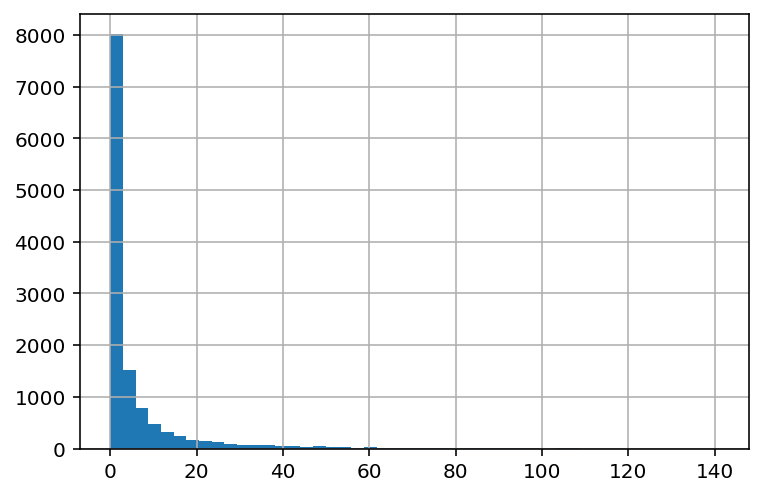

In [48]:
traindf.target.hist(bins=48)

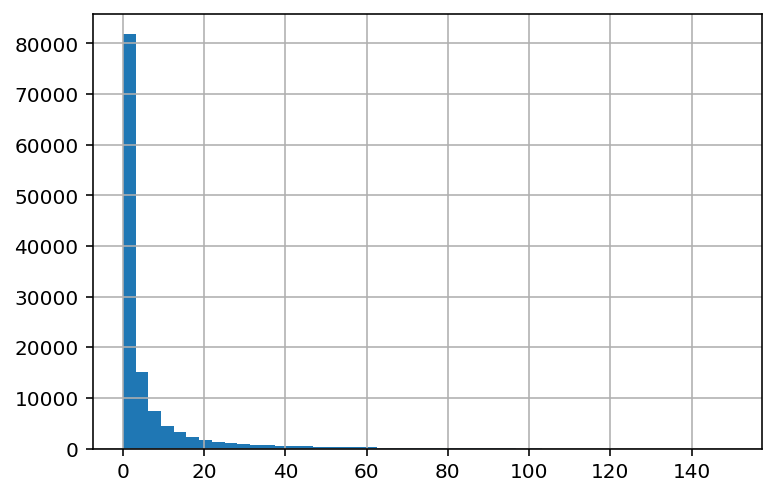

In [76]:
df = traindf.sample(frac=0.5,random_state=1)
df.target.hist(bins=48)

In [77]:
corr_target = df.drop("target", axis=1).apply(lambda x: x.corr(df.target))

In [79]:
CORR_THRESHOLD = 0.3
selected_columnes_by_corr = corr_target[abs(corr_target) > CORR_THRESHOLD]
selected_columnes_by_corr

tsoa_mail_cnt                      0.304954
cnt_sms_category_collect           0.483632
MV_Traf_2G_d_Mb                    0.321379
MV_Traf_3G_d_Mb                    0.310693
MV_Traf_4G_d_Mb                    0.314029
non_accum_internet_vol_std_mnt1    0.315228
non_accum_internet_vol_max_mnt3    0.432033
non_accum_internet_vol_std_mnt3    0.405964
gprs_tar_vol_mea_mnt1              0.301661
gprs_tar_vol_std_mnt1              0.300897
gprs_tar_vol_mea_mnt3              0.307171
gprs_tar_vol_std_mnt3              0.300299
dpi_duration                       0.399889
dpi_upload                         0.456130
dpi_download                       0.638506
dpi_events                         0.353396
dtype: float64

In [78]:
corr_target

abon_id                     0.081667
Balance_uah                -0.003732
TM_ID                       0.141488
lt                         -0.057652
CALCULATION_METHOD_ID      -0.075798
                              ...   
imei_mean_day_announced    -0.026334
device_has_hardware_umts    0.023680
device_has_LTE_BAND_3       0.100192
myvf_day_usage              0.034028
GBA_remain_days            -0.012176
Length: 905, dtype: float64

In [59]:
train_corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(train_corr,center=0,vmin=-1, vmax=1,cmap='vlag', annot=True);

Error in callback <function flush_figures at 0x7fd058d285e0> (for post_execute):


KeyboardInterrupt: 